In [1]:
#reading data from csv file
import pandas as pd
df = pd.read_csv("main_playlist_sentiment.csv")
df = df.drop_duplicates(subset = "track_name")
df = df.reset_index(drop = True)
df.head()

,artist_name,artist_id,track_name,track_id,lyric,sentiment,sentiment_score
0,Zendaya,6sCbFbEjbYepqswM1vWjjs,Butterflies,1nV9EKNIAORTvadQ19jkik,Wait a minute\nEvery time you're near\nMy body...,Positive,95.48
1,J.Fla,2GbvMs4GBhcjd9d4N9sGUV,Shape of You,4M4h9xNOFpyDI3f2HZDXkg,The club isn't the best place to find a lover\...,Positive,98.88
2,Charli XCX,25uiPmTg16RbhZWAqwLBy5,Boys,5o4yGlG0PfeVUa6ClIyOxq,"I was busy thinkin' 'bout boys\nBoys, boys\nI ...",Positive,89.57
3,Meghan Trainor,6JL8zeS1NmiOftqZTRgdTz,Me Too,3KwwE4sgCzMaKWq6QBebmX,Ow!\n\nWho's that sexy thing I see over there?...,Positive,87.63
4,Tungevaag,49CE2ffZ6Z3zeYSDauSKck,Samsara (feat. Emila),04xLp87480JkyiHIiWgj8I,"Times running up, tick tock\nAnd I am set on m...",Positive,11.54


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
def sentiment():
    sentiment_diff = []
    artist = input("Enter artist name: ")
    if artist in df["artist_name"].values:
        song = input("Enter song name: ")
        if song in df["track_name"].values:
            sentiment = df[df["track_name"] == song]["sentiment_score"].values[0]
            ind = df[df["track_name"] == song]["sentiment_score"].index.values[0]
            for val,ind2 in zip(df["sentiment_score"].values, df["sentiment_score"].index):
                if val != sentiment and ind2 != ind:
                    sentiment_diff.append(round(abs(sentiment - val),4))
            sentiment_diff_ord = sorted(sentiment_diff)
            sentiment_diff_ord = list(dict.fromkeys(sentiment_diff_ord))
            indexes = [sentiment_diff.index(i) +1  for i in sentiment_diff_ord]
            indexes2 = []
            for i in indexes:
                if i < ind:
                    indexes2.append(i - 1)
                else:
                    indexes2.append(i)
            indexes2 = [i + 1 if i == 792 else i for i in indexes2]
            most_similar = df.iloc[indexes2[:20]][["artist_name", "track_name", "sentiment", "sentiment_score"]]
            least_similar = df.iloc[indexes2[-20:]][["artist_name", "track_name", "sentiment", "sentiment_score"]]
            print("\nMost Similar 20 tracks:\n")
            display(most_similar.reset_index(drop = True))
            print("\nLeast Similar 20 tracks:\n")
            display(least_similar.reset_index(drop = True))
            plt.figure(figsize = (10, 6))
            sns.barplot(data = most_similar, x = "track_name", y ="sentiment_score")
            plt.title("Top 20 Most Similar Tracks", fontsize = 15)
            plt.xticks(rotation = 90)
            plt.show()
            plt.figure(figsize = (10, 6))
            sns.barplot(data = least_similar, x = "track_name", y ="sentiment_score")
            plt.title("Top 20 Least Similar Tracks", fontsize = 15)
            plt.xticks(rotation = 90)
            plt.show()
        else:
            print("Song not found")
    else:
        print("Artist Not Found")


Most Similar 20 tracks:



,artist_name,track_name,sentiment,sentiment_score
0,Twenty One Pilots,Heathens,Positive,93.45
1,Charlie Puth,How Long,Positive,93.36
2,Chlöe,Surprise,Positive,93.53
3,The Script,The Man Who Can't Be Moved,Positive,93.57
4,Calum Scott,Dancing On My Own,Positive,93.61
5,Taylor Swift,You're Not Sorry,Positive,93.63
6,Ariana Grande,Piano,Positive,93.66
7,Sia,Big Girls Cry,Negative,93.68
8,Justin Bieber,Right Here,Positive,93.19
9,Modjo,Lady - Hear Me Tonight,Positive,93.71



Least Similar 20 tracks:



,artist_name,track_name,sentiment,sentiment_score
0,Cigarettes After Sex,Apocalypse,Negative,12.85
1,Avril Lavigne,When You're Gone,Negative,12.80
2,The Fray,How to Save a Life,Positive,11.64
3,Tungevaag,Samsara (feat. Emila),Positive,11.54
4,Lenka,Trouble Is a Friend,Positive,9.71
5,Ne-Yo,So Sick,Negative,9.00
6,Halsey,Haunting,Negative,8.44
7,Pitbull,Fireball (feat. John Ryan),Positive,7.77
8,Shivaree,Goodnight Moon,Positive,7.72
9,Taylor Swift,"Would've, Could've, Should've",Positive,7.31


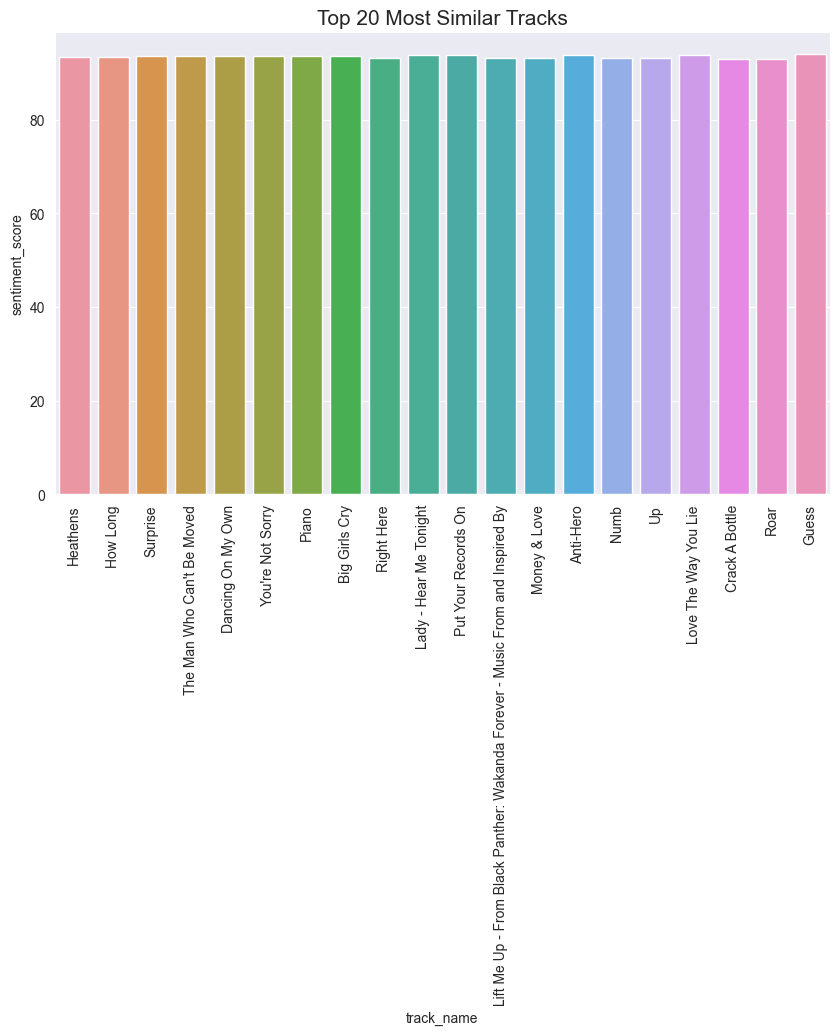

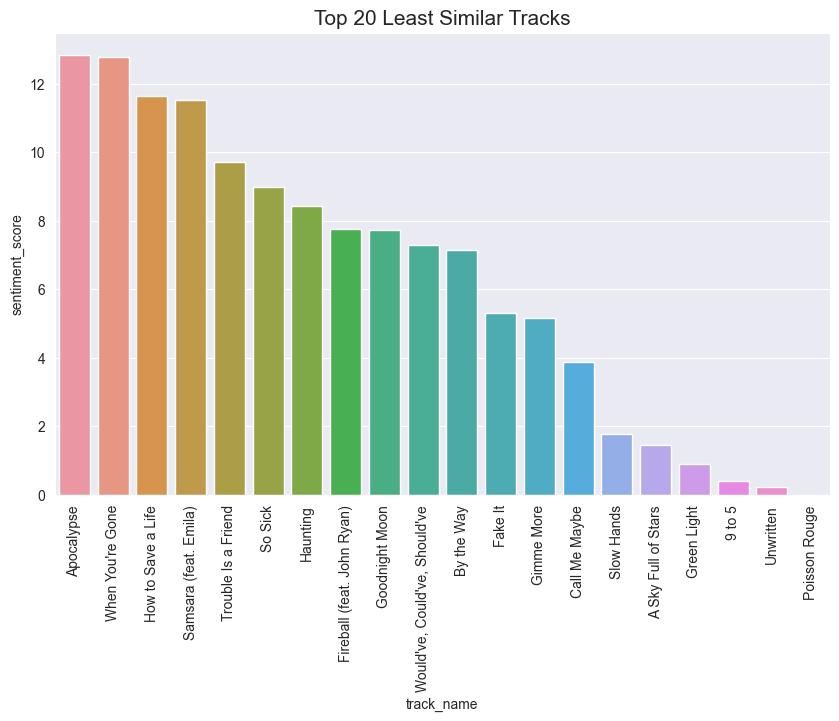

In [3]:
sentiment()
